# NN 선형 회귀
* 자동차 연비 데이터

* fully-connected layer, Dense Layer(keras), Linear Layer(pythorch)
* Linear Regression
* autompg - 연비 데이터, 자동차 관련 데이터

In [184]:
# !pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 815 µs (started: 2024-06-28 05:24:08 +00:00)


In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf # colab에 설치가 되어 있음
import keras

time: 568 µs (started: 2024-06-28 05:24:11 +00:00)


## 1. 데이터 준비

In [186]:
#!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/auto-mpg.csv

--2024-06-28 05:24:26--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/auto-mpg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18131 (18K) [text/plain]
Saving to: ‘auto-mpg.csv’

auto-mpg.csv        100%[===================>]  17.71K  --.-KB/s    in 0.001s  

2024-06-28 05:24:27 (23.7 MB/s) - ‘auto-mpg.csv’ saved [18131/18131]

time: 308 ms (started: 2024-06-28 05:24:26 +00:00)


In [188]:
# 처음 보는 데이터는 EDA - pass
auto = pd.read_csv('auto-mpg.csv')
auto.shape # feature가 9개 398개 sample이 존재

(398, 9)

time: 14.9 ms (started: 2024-06-28 05:25:20 +00:00)


In [189]:
# mpg를 y로 잡고, 스케일링해서 넣기
df = auto.copy()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


time: 28.4 ms (started: 2024-06-28 05:25:24 +00:00)


In [192]:
# horsepower가 숫자로 보이지만, object로 나옴
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
time: 10.8 ms (started: 2024-06-28 05:26:20 +00:00)


In [193]:
# 컬럼이름 변경
df.columns = [col.replace(' ', '_') for col in df.columns]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


time: 34.1 ms (started: 2024-06-28 05:26:23 +00:00)


In [194]:
# 문자열이므
df['horsepower'].value_counts()

horsepower
150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: count, Length: 94, dtype: int64

time: 6.9 ms (started: 2024-06-28 05:26:27 +00:00)


In [195]:
# unique - 전체 표시
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

time: 4.56 ms (started: 2024-06-28 05:26:30 +00:00)


In [196]:
# ? 찾아서 버리기
# 결측치로 변경 -> 결측치와 한번에 처리
df.loc[df['horsepower'] == '?', 'horsepower'] = np.nan

time: 2.95 ms (started: 2024-06-28 05:26:34 +00:00)


In [197]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

time: 6.15 ms (started: 2024-06-28 05:26:36 +00:00)


In [198]:
df.dropna(subset=['horsepower'], inplace=True)
#df.dropna()
df.isna().sum() # 원본은 안바꿈

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

time: 10.4 ms (started: 2024-06-28 05:26:38 +00:00)


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB
time: 12.3 ms (started: 2024-06-28 05:26:40 +00:00)


In [200]:
# horsepower 숫자형으로 변경
df['horsepower'] = df['horsepower'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB
time: 13.2 ms (started: 2024-06-28 05:26:43 +00:00)


### origin, car_name 날려버리기

In [201]:
df = df.drop(['origin', 'car_name'], axis = 1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


time: 28.9 ms (started: 2024-06-28 05:26:47 +00:00)


### train, test 분리

In [202]:
# Standard Scaler
# train_test_split을 사용해서 진행함
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
train.shape, test.shape

((313, 7), (79, 7))

time: 6.34 ms (started: 2024-06-28 05:26:50 +00:00)


### X, y 분리

In [203]:
X_train = train.drop('mpg', axis=1)
y_train = train['mpg']
X_train.shape, y_train.shape

((313, 6), (313,))

time: 5.9 ms (started: 2024-06-28 05:26:52 +00:00)


### 스케일링

In [204]:
from sklearn.preprocessing import StandardScaler
# scale되고, numpy 값으로 변경
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_train_s

array([[ 0.30486156,  0.28457757,  0.14142863,  0.75480297,  1.1217589 ,
         0.49452752],
       [-0.87318372, -0.53588042, -0.32949862, -0.49312922, -0.22893966,
        -0.0572982 ],
       [ 0.30486156, -0.23665456, -0.19868549, -0.00252992, -0.37111846,
        -0.33321105],
       ...,
       [-0.87318372, -0.4297035 , -0.51263699, -0.1561399 ,  0.73076722,
         0.49452752],
       [-0.87318372, -0.94128319, -1.0358895 , -0.72175802,  1.83265289,
         1.32226608],
       [ 1.48290683,  1.97375578,  1.18793363,  2.39450014, -0.54884195,
        -0.88503677]])

time: 11.4 ms (started: 2024-06-28 05:26:56 +00:00)


In [205]:
# y_train
y_train = y_train.to_numpy()
y_train

array([18.6, 25. , 18. , 15. , 39. , 15.5, 29.8, 25. , 21.5, 17. , 16. ,
       22.3, 30.7, 30. , 31. , 19.2, 16.5, 18. , 13. , 27.5, 18. , 11. ,
       17. , 14. , 26. , 34.2, 34.4, 35.1, 20. , 22. , 18.2, 32. , 31.9,
       21. , 22. , 37.2, 32.9, 19.4, 15. , 22. , 21. , 37. , 21. , 15. ,
       31. , 23. , 24.5, 29. , 30.5, 15. , 34.7, 27. , 28. , 19. , 41.5,
       17.5, 29. , 26. , 31.8, 18. , 16.5, 13. , 19. , 30. , 20. , 19. ,
       27. , 23. , 14. , 20.6, 27.9, 15. , 32. , 12. , 23. , 33.5, 25.5,
       40.8, 16.5, 32.3, 44.3, 12. , 32.8, 24. , 18.1, 14. , 13. , 11. ,
       18. , 32. , 27.2, 16. , 17.5, 12. , 26. , 14. , 28. , 20. , 13. ,
       27.2, 29. , 19.1, 28. , 27. , 19. , 26. , 15.5, 13. , 38. , 18. ,
       23.7, 24.5, 34. , 23. , 26. , 33. , 29.5, 15. , 24. , 32. , 14. ,
       14. , 39.1, 17.5, 17. , 21. , 33. , 25.8, 20.3, 24. , 20.2, 23.9,
       34. , 20.2, 28.1, 13. , 39.4, 14. , 16. , 18.5, 20. , 32. , 18. ,
       26.5, 16. , 16. , 29. , 10. , 15. , 46.6, 20

time: 5.39 ms (started: 2024-06-28 05:26:59 +00:00)


In [206]:
print(type(X_train_s), type(y_train))
print(X_train_s.shape, y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(313, 6) (313,)
time: 872 µs (started: 2024-06-28 05:27:01 +00:00)


## 2. 모델 학습

In [207]:
X_train_s.shape

(313, 6)

time: 3.86 ms (started: 2024-06-28 05:27:04 +00:00)


In [208]:
## Neural Network 사용
from keras import layers

model = keras.Sequential([
    # input_shape은 한번에 몇개 씩 들어올지 결정 - shape봤을 때, feature만큼(젤 처음만)
    layers.Dense(units=5, activation='relu', input_shape=(6, )),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(units=1) # 최종적으로 값이 하나, acti는 linear이므로 설정 X
])

time: 70.1 ms (started: 2024-06-28 05:27:08 +00:00)


In [209]:
# 파라미터(weight)가 57개 있음
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 35        
                                                                 
 dense_16 (Dense)            (None, 3)                 18        
                                                                 
 dense_17 (Dense)            (None, 1)                 4         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 27.7 ms (started: 2024-06-28 05:27:10 +00:00)


In [210]:
# model compile
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mse', 'mae'] # mae는 제곱안하고 절대값
            )

time: 12.8 ms (started: 2024-06-28 05:27:12 +00:00)


### model 학습


In [211]:
EPOCHS = 100
BATCH_SIZE = 16
# train 데이터는 무조건 잘되므로, val loss, mse, mae를 확인
history = model.fit(X_train_s, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_split=0.2 # batch 16개 중 0.2fmf validation 데이터로 사용함
          )

Epoch 1/100
16/16 [==============================] - 1s 16ms/step - loss: 571.0573 - mse: 571.0573 - mae: 22.7494 - val_loss: 639.9172 - val_mse: 639.9172 - val_mae: 24.2581
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 562.3987 - mse: 562.3987 - mae: 22.5883 - val_loss: 630.3607 - val_mse: 630.3607 - val_mae: 24.0862
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 553.9830 - mse: 553.9830 - mae: 22.4281 - val_loss: 620.0129 - val_mse: 620.0129 - val_mae: 23.9000
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 544.7781 - mse: 544.7781 - mae: 22.2559 - val_loss: 609.6179 - val_mse: 609.6179 - val_mae: 23.7124
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 535.3511 - mse: 535.3511 - mae: 22.0795 - val_loss: 598.6318 - val_mse: 598.6318 - val_mae: 23.5138
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 525.7203 - mse: 525.7203 - mae: 21.8971 - val_loss: 586.8950 

In [212]:
# 학습 곡선 그리기
hist = history.history
epochs = history.epoch

time: 575 µs (started: 2024-06-28 05:27:26 +00:00)


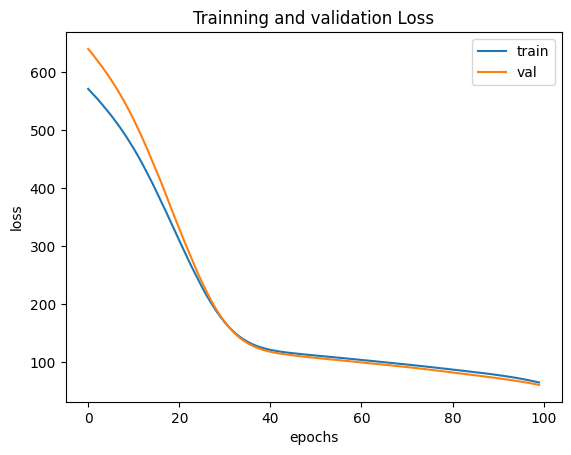

time: 247 ms (started: 2024-06-28 05:27:26 +00:00)


In [213]:
plt.plot(epochs, hist['loss'], label='train')
plt.plot(epochs, hist['val_loss'], label='val')
plt.title('Trainning and validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## 3. 평가

In [216]:
X_test = test.drop('mpg', axis=1)
y_test = test['mpg']
X_test.shape, y_test.shape

((79, 6), (79,))

time: 5.12 ms (started: 2024-06-28 05:28:08 +00:00)


In [217]:
X_test_s = ss.transform(X_test)
y_test = y_test.to_numpy()
X_test_s.shape, y_test.shape

((79, 6), (79,))

time: 8.05 ms (started: 2024-06-28 05:28:09 +00:00)


In [218]:
print(type(X_test_s), type(y_test))
print(X_test_s.shape, y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(79, 6) (79,)
time: 829 µs (started: 2024-06-28 05:28:10 +00:00)


In [219]:
# 예측값
y_pred = model.predict(X_test_s)
y_pred

3/3 [==============================] - 0s 4ms/step


array([[26.445408 ],
       [20.982458 ],
       [36.342686 ],
       [27.516819 ],
       [29.546364 ],
       [29.57847  ],
       [ 3.5822742],
       [30.869019 ],
       [ 8.852554 ],
       [34.079422 ],
       [ 4.4961143],
       [11.765482 ],
       [ 3.5822742],
       [28.189413 ],
       [ 7.565795 ],
       [32.77071  ],
       [ 9.624739 ],
       [34.07167  ],
       [28.134829 ],
       [28.878859 ],
       [ 6.8889804],
       [43.54235  ],
       [37.382584 ],
       [ 5.8093104],
       [29.83369  ],
       [22.673801 ],
       [19.188675 ],
       [ 5.197091 ],
       [33.684307 ],
       [22.753256 ],
       [ 3.5822742],
       [13.850645 ],
       [ 4.6737585],
       [32.919357 ],
       [ 3.5822742],
       [38.71886  ],
       [ 3.5822742],
       [24.50005  ],
       [ 3.5822742],
       [ 3.5822742],
       [ 3.5822742],
       [27.410078 ],
       [36.810715 ],
       [25.269447 ],
       [ 3.5822742],
       [ 3.5822742],
       [ 6.2986417],
       [33.66

time: 199 ms (started: 2024-06-28 05:28:12 +00:00)


In [220]:
# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('mse : ', mean_squared_error(y_test, y_pred))
print('mae : ', mean_absolute_error(y_test, y_pred))

mse :  58.331430971680895
mae :  6.238910953304435
time: 3.36 ms (started: 2024-06-28 05:28:17 +00:00)


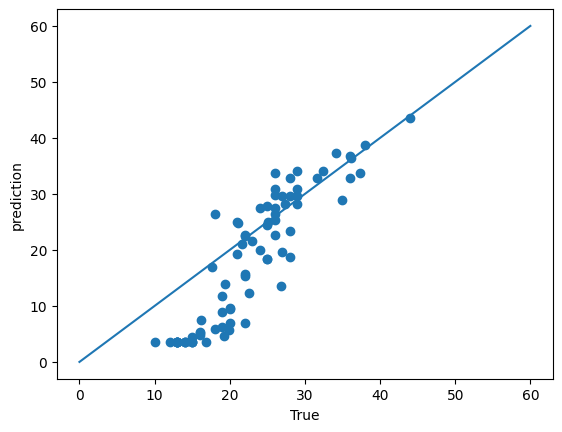

time: 309 ms (started: 2024-06-28 05:29:42 +00:00)


In [224]:
plt.scatter(y_test, y_pred)
plt.plot([0, 60], [0, 60])
plt.xlabel('True')
plt.ylabel('prediction')
plt.show()